<a href="https://colab.research.google.com/github/Aesol-Ahn/DA_Exercise/blob/master/Named%20Entity%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#양방향lstm

In [2]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/Franck-Dernoncourt/NeuroNER/master/neuroner/data/conll2003/en/train.txt", filename="train.txt")


('train.txt', <http.client.HTTPMessage at 0x7f2ce06d9e48>)

In [3]:
import re
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np


In [4]:
#다운된 train.txt의 3번줄부터 읽어들여야함. 태깅결과가 어케나오는지 연습할 수 있는 파일

In [25]:
f = open('train.txt', 'r')
tagged_sentences = []
sentence = []

In [26]:
for line in f:
  if len(line)==0 or line.startswith('-DOCSTART') or line[0]=="\n":
  #line길이가 0이거나 line이 첫번째줄이거나 line이 줄바꿈이거나...라는 뜻
  #왜냐면 이 train.txt내용 첫번째가 -DOCSTART 두번째줄이 줄바꿈
    if len(sentence) > 0:
      tagged_sentences.append(sentence)
      sentence = []
    continue
  #밑에는 태그를 추출하는 구문
  splits = line.split(' ') # 공백을 기준으로 속성을 구분한다.
  splits[-1] = re.sub(r'\n', '', splits[-1]) # 줄바꿈 표시 \n을 제거한다.
  word = splits[0].lower() # 단어들은 소문자로 바꿔서 저장한다.
  sentence.append([word, splits[-1]]) # 단어와 개체명 태깅만 기록한다.


In [27]:
len(tagged_sentences)

14041

In [34]:
tagged_sentences[1]

[['peter', 'B-PER'], ['blackburn', 'I-PER']]

In [30]:
#zip 함수란?

A = [1,2,3]
B = ['A','B','c']

for i in zip(A,B):
    print(i)


(1, 'A')
(2, 'B')
(3, 'c')


In [31]:
re_L = list(zip(A,B))
re_L

#리스트안에 튜플형식으로 묶여서 들어가 있음.

[(1, 'A'), (2, 'B'), (3, 'c')]

In [35]:
for tagged_sentence in tagged_sentences:
  print(tagged_sentence)
  sentence, tag_info=zip(*tagged_sentence)
  break

[['eu', 'B-ORG'], ['rejects', 'O'], ['german', 'B-MISC'], ['call', 'O'], ['to', 'O'], ['boycott', 'O'], ['british', 'B-MISC'], ['lamb', 'O'], ['.', 'O']]


In [36]:
sentence

('eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.')

In [37]:
tag_info

('B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O')

In [38]:
sentences, ner_tags = [], [] 
for tagged_sentence in tagged_sentences: # 14,041개의 문장 샘플을 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentence) # 각 샘플에서 단어들은 sentence에 개체명 태깅 정보들은 tag_info에 저장.
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장한다.
    ner_tags.append(list(tag_info)) # 각 샘플에서 개체명 태깅 정보만 저장한다.
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))


샘플의 최대 길이 : 113
샘플의 평균 길이 : 14.501887


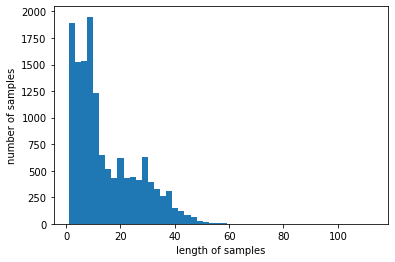

In [39]:
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()


In [40]:
#토큰화, 인코딩

In [41]:
max_words=4000

#가장 빈도가 높은 4천개 단어를 사용하겠다.

In [43]:
src_tokenizer = Tokenizer(num_words=max_words, oov_token='OOV')
#4천개 안에 못드는건 oov로 설정
src_tokenizer.fit_on_texts(sentences)


In [45]:
#src_tokenizer.word_counts
src_tokenizer.word_index

{'OOV': 1,
 'the': 2,
 '.': 3,
 ',': 4,
 'of': 5,
 'in': 6,
 'to': 7,
 'a': 8,
 'and': 9,
 '(': 10,
 ')': 11,
 '"': 12,
 'on': 13,
 'said': 14,
 "'s": 15,
 'for': 16,
 '1': 17,
 '-': 18,
 'at': 19,
 'was': 20,
 '2': 21,
 '0': 22,
 '3': 23,
 'with': 24,
 'that': 25,
 'he': 26,
 'from': 27,
 'it': 28,
 'by': 29,
 'is': 30,
 ':': 31,
 'as': 32,
 '4': 33,
 'had': 34,
 'his': 35,
 'has': 36,
 'but': 37,
 'an': 38,
 'not': 39,
 'were': 40,
 'be': 41,
 'after': 42,
 'have': 43,
 'first': 44,
 'new': 45,
 'who': 46,
 'will': 47,
 'they': 48,
 '5': 49,
 'two': 50,
 'u.s.': 51,
 'been': 52,
 '$': 53,
 '--': 54,
 'their': 55,
 'beat': 56,
 'are': 57,
 '6': 58,
 'which': 59,
 'would': 60,
 'this': 61,
 'up': 62,
 'its': 63,
 'year': 64,
 'i': 65,
 'last': 66,
 'percent': 67,
 'out': 68,
 'we': 69,
 'thursday': 70,
 'one': 71,
 'million': 72,
 'over': 73,
 'government': 74,
 'wednesday': 75,
 'police': 76,
 '7': 77,
 'results': 78,
 'against': 79,
 'second': 80,
 'when': 81,
 '/': 82,
 'also': 83,


In [46]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)


In [47]:
#src는 빈도높은 단어 사용했고, 나머지는 oov로 대체
#ner에는 태그가 들어가있음.태그 수가 어차피 적음(9개) (ner_Tags는 다씀. oov 등이 없음) 

In [48]:
tar_tokenizer.word_index

{'b-loc': 2,
 'b-misc': 7,
 'b-org': 4,
 'b-per': 3,
 'i-loc': 8,
 'i-misc': 9,
 'i-org': 6,
 'i-per': 5,
 'o': 1}

In [50]:
vocab_size = max_words
tag_size = len(tar_tokenizer.word_index) + 1

print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))


단어 집합의 크기 : 4000
개체명 태깅 정보 집합의 크기 : 10


In [52]:
#sentences
src_tokenizer.texts_to_sequences(sentences) #수치로바꿈


[[989, 1, 205, 629, 7, 3939, 216, 1, 3],
 [774, 1872],
 [726, 150],
 [2,
  219,
  334,
  14,
  13,
  70,
  28,
  1,
  24,
  205,
  3940,
  7,
  2404,
  7,
  1,
  216,
  1,
  406,
  3382,
  2009,
  519,
  1745,
  1873,
  648,
  309,
  41,
  1,
  7,
  1632,
  3],
 [124,
  15,
  2991,
  7,
  2,
  219,
  300,
  15,
  2660,
  801,
  1,
  1,
  14,
  13,
  75,
  2404,
  276,
  914,
  1,
  27,
  539,
  127,
  125,
  137,
  406,
  2,
  2405,
  3940,
  20,
  1,
  3],
 [12,
  69,
  185,
  213,
  357,
  220,
  567,
  1,
  170,
  69,
  185,
  213,
  859,
  220,
  3383,
  16,
  28,
  4,
  12,
  2,
  334,
  15,
  416,
  187,
  1,
  594,
  2010,
  1,
  90,
  8,
  188,
  3384,
  3],
 [26,
  14,
  683,
  2405,
  2181,
  20,
  2661,
  9,
  141,
  28,
  20,
  365,
  25,
  775,
  20,
  990,
  28,
  276,
  41,
  580,
  29,
  2,
  219,
  300,
  3],
 [26,
  14,
  8,
  2182,
  66,
  233,
  29,
  989,
  1129,
  2406,
  1,
  3385,
  7,
  595,
  1632,
  1,
  4,
  1,
  9,
  3941,
  1,
  27,
  2,
  581,
  9,
  2662

In [53]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)


In [54]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word


In [55]:
decoded = []
for index in X_train[0] : # 첫번째 샘플 안의 인덱스들에 대해서
    decoded.append(index_to_word[index]) # 다시 단어로 변환

print('기존 문장 : {}'.format(sentences[0]))
print('빈도수가 낮은 단어가 OOV 처리된 문장 : {}'.format(decoded))


기존 문장 : ['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
빈도수가 낮은 단어가 OOV 처리된 문장 : ['eu', 'OOV', 'german', 'call', 'to', 'boycott', 'british', 'OOV', '.']


In [56]:
max_len = 70
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
# X_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
# y_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자0으로 채움.


In [57]:
X_train[0] #패딩결과 봐보기

array([ 989,    1,  205,  629,    7, 3939,  216,    1,    3,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0], dtype=int32)

In [58]:
y_train[0]

array([4, 1, 7, 1, 1, 1, 7, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=777)


In [60]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)


In [61]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))



훈련 샘플 문장의 크기 : (11232, 70)
훈련 샘플 레이블의 크기 : (11232, 70, 10)
테스트 샘플 문장의 크기 : (2809, 70)
테스트 샘플 레이블의 크기 : (2809, 70, 10)


In [67]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from keras.optimizers import Adam


In [68]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dense(tag_size, activation='softmax'))


In [69]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=8,  validation_data=(X_test, y_test))


Epoch 1/8
88/88 [==============================] - 123s 1s/step - loss: 0.1881 - accuracy: 0.8242 - val_loss: 0.1235 - val_accuracy: 0.8333
Epoch 2/8
88/88 [==============================] - 122s 1s/step - loss: 0.0999 - accuracy: 0.8542 - val_loss: 0.0802 - val_accuracy: 0.8836
Epoch 3/8
88/88 [==============================] - 122s 1s/step - loss: 0.0720 - accuracy: 0.8955 - val_loss: 0.0603 - val_accuracy: 0.9140
Epoch 4/8
88/88 [==============================] - 122s 1s/step - loss: 0.0525 - accuracy: 0.9276 - val_loss: 0.0451 - val_accuracy: 0.9397
Epoch 5/8
88/88 [==============================] - 121s 1s/step - loss: 0.0390 - accuracy: 0.9457 - val_loss: 0.0378 - val_accuracy: 0.9477
Epoch 6/8
88/88 [==============================] - 120s 1s/step - loss: 0.0320 - accuracy: 0.9551 - val_loss: 0.0350 - val_accuracy: 0.9524
Epoch 7/8
88/88 [==============================] - 121s 1s/step - loss: 0.0275 - accuracy: 0.9605 - val_loss: 0.0340 - val_accuracy: 0.9538
Epoch 8/8
88/88 [===

In [70]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))


88/88 [==============================] - 13s 152ms/step - loss: 0.0332 - accuracy: 0.9558

 테스트 정확도: 0.9558


In [72]:
X_test[10]

array([2572, 1121,    4, 1064,  743, 1436,   20,    1,    1,    6,   38,
          1, 1380,   13,   87, 2640, 2649,    4,  285,  676,  856,   19,
          2,  402,  145,  724,   13,   92,  543,    7,    1,   87,  612,
        224,   15, 2003,  619, 1548,    3,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0], dtype=int32)

In [73]:
y_test[10] #태그 정보의 위치

#원핫인코딩이 되어져있는 상태래

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 

In [75]:
model.predict(X_test[10]).shape

#(70, 1, 10)에서 10이 필요함, 70가지 중에 1부터 9까지 인덱스

y_predicted = model.predict(X_test[10])


In [76]:
np.argmax(y_predicted, axis = -1).shape

(70, 1)

In [77]:
#모델에서 예측한 태그 정보
y_predicted=np.argmax(y_predicted, axis=-1)

In [78]:
#실제값은 y_test에 들어가 있으니

y_test[10].shape

(70, 10)

In [80]:
true = np.argmax(y_test[10], axis = -1)

In [81]:
true

array([3, 5, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 1, 1, 1, 1, 1,
       1, 7, 9, 9, 1, 1, 1, 1, 1, 1, 3, 5, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [83]:
i=10 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[10], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t].upper(), index_to_ner[pred].upper()))


단어             |실제값  |예측값
-----------------------------------
sarah            : B-PER   B-PER
brady            : I-PER   I-PER
,                : O       O
whose            : O       O
republican       : B-MISC  B-MISC
husband          : O       O
was              : O       O
OOV              : O       O
OOV              : O       O
in               : O       O
an               : O       O
OOV              : O       O
attempt          : O       O
on               : O       O
president        : O       O
ronald           : B-PER   B-PER
reagan           : I-PER   I-PER
,                : O       O
took             : O       O
centre           : O       O
stage            : O       O
at               : O       O
the              : O       O
democratic       : B-MISC  B-MISC
national         : I-MISC  I-MISC
convention       : I-MISC  I-MISC
on               : O       O
monday           : O       O
night            : O       O
to               : O       O
OOV              : O       O
pre

In [ ]:
#https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus
#Named Entity Recognition(개체명 인식)
#개체명 인식과 관련된 코퍼스 링크

#train.txt 의 데이터에 대한 설명이 들어있음

